# US Airlines - Delays Jan 23 - steps to prepare the data for Analysis.

In [125]:
#importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Airline projects/airline_data.csv")

In [127]:
#checking the data structure

df.head(20)

,DATE,CARRIER,TAIL,FROM,TO,DELAY_AT_DEP,DELAY_AT_ARR
0,01/01/2023 00:00,9E,N131EV,JFK,BGR,-4,-7.0
1,01/01/2023 00:00,9E,N131EV,JFK,ORD,-4,-24.0
2,01/01/2023 00:00,9E,N131EV,ORD,JFK,4,-3.0
3,01/01/2023 00:00,9E,N133EV,ABE,ATL,1,-9.0
4,01/01/2023 00:00,9E,N133EV,ATL,SGF,-5,-11.0
5,01/01/2023 00:00,9E,N133EV,SGF,ATL,-6,-7.0
6,01/01/2023 00:00,9E,N135EV,DTW,PVD,-3,-12.0
7,01/01/2023 00:00,9E,N135EV,JFK,DTW,2,1.0
8,01/01/2023 00:00,9E,N136EV,JFK,RDU,-5,-30.0
9,01/01/2023 00:00,9E,N136EV,RDU,DTW,-4,-21.0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528542 entries, 0 to 528541
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATE          528542 non-null  object 
 1   CARRIER       528542 non-null  object 
 2   TAIL          528542 non-null  object 
 3   FROM          528542 non-null  object 
 4   TO            528542 non-null  object 
 5   DELAY_AT_DEP  528542 non-null  int64  
 6   DELAY_AT_ARR  527197 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 28.2+ MB


In [129]:
#loading additional information about US airports

airports = pd.read_csv("/content/drive/MyDrive/Airline projects/airports.csv")

In [130]:
#checking data structure of the airports file:

airports.head(20)

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228
5,BHM,Birmingham International,Birmingham,AL,USA,33.562943,-86.753550
6,BNA,Nashville International,Nashville,TN,USA,36.124477,-86.678182
7,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
8,BUF,Buffalo Niagara Intl,Buffalo,NY,USA,42.940525,-78.732167
9,BUR,Burbank-Glendale-Pasadena,Burbank,CA,USA,34.200619,-118.358497


In [131]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA       341 non-null    object 
 1   AIRPORT    341 non-null    object 
 2   CITY       337 non-null    object 
 3   STATE      337 non-null    object 
 4   COUNTRY    341 non-null    object 
 5   LATITUDE   341 non-null    float64
 6   LONGITUDE  341 non-null    float64
dtypes: float64(2), object(5)
memory usage: 18.8+ KB


In [132]:
#joining both dataframes on airport code field:

airports_states = pd.merge(df, airports, left_on='FROM', right_on='IATA')

In [133]:
airports_states.head()

,DATE,CARRIER,TAIL,FROM,TO,DELAY_AT_DEP,DELAY_AT_ARR,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,01/01/2023 00:00,9E,N131EV,JFK,BGR,-4,-7.0,JFK,John F Kennedy Intl,New York,NY,USA,40.639751,-73.778926
1,01/01/2023 00:00,9E,N131EV,JFK,ORD,-4,-24.0,JFK,John F Kennedy Intl,New York,NY,USA,40.639751,-73.778926
2,01/01/2023 00:00,9E,N135EV,JFK,DTW,2,1.0,JFK,John F Kennedy Intl,New York,NY,USA,40.639751,-73.778926
3,01/01/2023 00:00,9E,N136EV,JFK,RDU,-5,-30.0,JFK,John F Kennedy Intl,New York,NY,USA,40.639751,-73.778926
4,01/01/2023 00:00,9E,N166PQ,JFK,MKE,1,0.0,JFK,John F Kennedy Intl,New York,NY,USA,40.639751,-73.778926


In [134]:
airports_states.STATE.unique()

array(['NY', 'IL', 'PA', 'GA', 'MO', 'MI', 'NC', 'IA', 'KS', 'MN', 'LA',
       'VA', 'TN', 'KY', 'IN', 'FL', 'RI', 'WI', 'MD', 'ME', 'SC', 'AL',
       'AR', nan, 'WV', 'OH', 'SD', 'MS', 'ND', 'VT', 'NE', 'CA', 'TX',
       'MA', 'AZ', 'CO', 'OK', 'WA', 'OR', 'CT', 'UT', 'NV', 'NJ', 'PR',
       'NM', 'VI', 'MT', 'HI', 'AK', 'ID', 'WY', 'NH', 'GU', 'AS'],
      dtype=object)

In [135]:
airports_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524632 entries, 0 to 524631
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATE          524632 non-null  object 
 1   CARRIER       524632 non-null  object 
 2   TAIL          524632 non-null  object 
 3   FROM          524632 non-null  object 
 4   TO            524632 non-null  object 
 5   DELAY_AT_DEP  524632 non-null  int64  
 6   DELAY_AT_ARR  523301 non-null  float64
 7   IATA          524632 non-null  object 
 8   AIRPORT       524632 non-null  object 
 9   CITY          524432 non-null  object 
 10  STATE         524432 non-null  object 
 11  COUNTRY       524632 non-null  object 
 12  LATITUDE      524632 non-null  float64
 13  LONGITUDE     524632 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 60.0+ MB


In [136]:
#loading csv with US states population:
population = pd.read_csv("/content/drive/MyDrive/Airline projects/NST-EST2022-ALLDATA.csv")

In [137]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUMLEV                 66 non-null     int64  
 1   REGION                 66 non-null     object 
 2   DIVISION               66 non-null     object 
 3   STATE                  66 non-null     int64  
 4   NAME                   66 non-null     object 
 5   ESTIMATESBASE2020      66 non-null     int64  
 6   POPESTIMATE2020        66 non-null     int64  
 7   POPESTIMATE2021        66 non-null     int64  
 8   POPESTIMATE2022        66 non-null     int64  
 9   NPOPCHG_2020           66 non-null     int64  
 10  NPOPCHG_2021           66 non-null     int64  
 11  NPOPCHG_2022           66 non-null     int64  
 12  BIRTHS2020             66 non-null     int64  
 13  BIRTHS2021             66 non-null     int64  
 14  BIRTHS2022             66 non-null     int64  
 15  DEATHS20

In [138]:
population.head(15)

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255
5,30,2,3,0,East North Central,47368637,47338744,47181948,47097779,-29893,...,11.204806,11.368786,-0.621578,-0.591707,0.783215,2.081402,-3.716477,-3.105991,-2.933262,-1.024589
6,30,2,4,0,West North Central,21616900,21622299,21654557,21689816,5399,...,10.741168,10.734911,0.698341,0.888466,0.845302,2.175646,-0.305983,-1.275044,0.539318,0.900601
7,20,3,0,0,South Region,126266262,126450613,127346029,128716192,184351,...,11.063685,10.983252,0.173186,0.547508,1.223200,3.239369,5.696892,6.779095,6.920092,10.018463
8,30,3,5,0,South Atlantic,66089861,66164801,66666348,67452940,74940,...,10.950398,11.011869,-0.417252,-0.162303,1.471567,3.880546,6.583049,7.809272,8.054617,11.689818
9,30,3,6,0,East South Central,19402323,19422567,19474372,19578002,20244,...,13.270042,13.260193,-1.813716,-1.593501,0.375351,0.959788,3.981856,5.887427,4.357207,6.847215


In [139]:
population.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'ESTIMATESBASE2020',
       'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'NPOPCHG_2020',
       'NPOPCHG_2021', 'NPOPCHG_2022', 'BIRTHS2020', 'BIRTHS2021',
       'BIRTHS2022', 'DEATHS2020', 'DEATHS2021', 'DEATHS2022',
       'NATURALCHG2020', 'NATURALCHG2021', 'NATURALCHG2022',
       'INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'INTERNATIONALMIG2022',
       'DOMESTICMIG2020', 'DOMESTICMIG2021', 'DOMESTICMIG2022', 'NETMIG2020',
       'NETMIG2021', 'NETMIG2022', 'RESIDUAL2020', 'RESIDUAL2021',
       'RESIDUAL2022', 'RBIRTH2021', 'RBIRTH2022', 'RDEATH2021', 'RDEATH2022',
       'RNATURALCHG2021', 'RNATURALCHG2022', 'RINTERNATIONALMIG2021',
       'RINTERNATIONALMIG2022', 'RDOMESTICMIG2021', 'RDOMESTICMIG2022',
       'RNETMIG2021', 'RNETMIG2022'],
      dtype='object')

In [140]:
#time to select only the columns we need:

population.drop(columns=['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'ESTIMATESBASE2020',
       'POPESTIMATE2020', 'POPESTIMATE2021', 'NPOPCHG_2020',
       'NPOPCHG_2021', 'NPOPCHG_2022', 'BIRTHS2020', 'BIRTHS2021',
       'BIRTHS2022', 'DEATHS2020', 'DEATHS2021', 'DEATHS2022',
       'NATURALCHG2020', 'NATURALCHG2021', 'NATURALCHG2022',
       'INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'INTERNATIONALMIG2022',
       'DOMESTICMIG2020', 'DOMESTICMIG2021', 'DOMESTICMIG2022', 'NETMIG2020',
       'NETMIG2021', 'NETMIG2022', 'RESIDUAL2020', 'RESIDUAL2021',
       'RESIDUAL2022', 'RBIRTH2021', 'RBIRTH2022', 'RDEATH2021', 'RDEATH2022',
       'RNATURALCHG2021', 'RNATURALCHG2022', 'RINTERNATIONALMIG2021',
       'RINTERNATIONALMIG2022', 'RDOMESTICMIG2021', 'RDOMESTICMIG2022',
       'RNETMIG2021', 'RNETMIG2022'], inplace = True)

In [141]:
#let's keep only the divisions by state:
population.drop(index=range(15), inplace = True)
population.reset_index(inplace = True)

In [142]:
population.NAME.unique()

array(['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [143]:
population.head(20)

,index,NAME,POPESTIMATE2022
0,15,Alaska,733583
1,16,Arizona,7359197
2,17,Arkansas,3045637
3,18,California,39029342
4,19,Colorado,5839926
5,20,Connecticut,3626205
6,21,Delaware,1018396
7,22,District of Columbia,671803
8,23,Florida,22244823
9,24,Georgia,10912876


In [144]:
#loading the excel  with the  abreviations and add it to the population excel:

abrev = pd.read_excel("/content/drive/MyDrive/Airline projects/StateAbreviations.xlsx")

abrev.head()

,STATE,ABREV
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [145]:
#mergint the states abreviation
states_info = pd.merge(population, abrev, left_on='NAME', right_on='STATE')

In [146]:
states_info.head(30)

,index,NAME,POPESTIMATE2022,STATE,ABREV
0,15,Alaska,733583,Alaska,AK
1,16,Arizona,7359197,Arizona,AZ
2,17,Arkansas,3045637,Arkansas,AR
3,18,California,39029342,California,CA
4,19,Colorado,5839926,Colorado,CO
5,20,Connecticut,3626205,Connecticut,CT
6,21,Delaware,1018396,Delaware,DE
7,23,Florida,22244823,Florida,FL
8,24,Georgia,10912876,Georgia,GA
9,25,Hawaii,1440196,Hawaii,HI


In [147]:
states_info.columns

Index(['index', 'NAME', 'POPESTIMATE2022', 'STATE', 'ABREV'], dtype='object')

In [148]:
states_info.drop(columns = ["index","NAME"], inplace = True)

In [149]:
states_info.head(30)

,POPESTIMATE2022,STATE,ABREV
0,733583,Alaska,AK
1,7359197,Arizona,AZ
2,3045637,Arkansas,AR
3,39029342,California,CA
4,5839926,Colorado,CO
5,3626205,Connecticut,CT
6,1018396,Delaware,DE
7,22244823,Florida,FL
8,10912876,Georgia,GA
9,1440196,Hawaii,HI


In [150]:
# And now let's add this state information in one dataframe

final_dataframe = pd.merge(airports_states, states_info, left_on='STATE', right_on='ABREV')

In [151]:
final_dataframe.tail()

,DATE,CARRIER,TAIL,FROM,TO,DELAY_AT_DEP,DELAY_AT_ARR,IATA,AIRPORT,CITY,STATE_x,COUNTRY,LATITUDE,LONGITUDE,POPESTIMATE2022,STATE_y,ABREV
521738,1/31/2023 12:00:00 AM,WN,N8762Q,MHT,BWI,-5,-6.0,MHT,Manchester,Manchester,NH,USA,42.934516,-71.437056,1395231,New Hampshire,NH
521739,1/31/2023 12:00:00 AM,WN,N945WN,MHT,BWI,-5,-11.0,MHT,Manchester,Manchester,NH,USA,42.934516,-71.437056,1395231,New Hampshire,NH
521740,1/31/2023 12:00:00 AM,WN,N969WN,MHT,MDW,-8,18.0,MHT,Manchester,Manchester,NH,USA,42.934516,-71.437056,1395231,New Hampshire,NH
521741,1/31/2023 12:00:00 AM,YX,N726YX,MHT,EWR,-16,-9.0,MHT,Manchester,Manchester,NH,USA,42.934516,-71.437056,1395231,New Hampshire,NH
521742,1/31/2023 12:00:00 AM,YX,N726YX,MHT,EWR,-7,27.0,MHT,Manchester,Manchester,NH,USA,42.934516,-71.437056,1395231,New Hampshire,NH


In [152]:
#keeping only the relevant information in the dataframe:

final_dataframe.drop(columns = ["STATE_x", "COUNTRY", "IATA"], inplace = True)

In [153]:
final_dataframe.rename(columns={'POPESTIMATE2022': 'State Population', 'STATE_y': 'STATE', "ABREV" : "State Inititals"},inplace = True)

In [154]:
final_dataframe

,DATE,CARRIER,TAIL,FROM,TO,DELAY_AT_DEP,DELAY_AT_ARR,AIRPORT,CITY,LATITUDE,LONGITUDE,State Population,STATE,State Inititals
0,01/01/2023 00:00,9E,N131EV,JFK,BGR,-4,-7.0,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
1,01/01/2023 00:00,9E,N131EV,JFK,ORD,-4,-24.0,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
2,01/01/2023 00:00,9E,N135EV,JFK,DTW,2,1.0,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
3,01/01/2023 00:00,9E,N136EV,JFK,RDU,-5,-30.0,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
4,01/01/2023 00:00,9E,N166PQ,JFK,MKE,1,0.0,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521738,1/31/2023 12:00:00 AM,WN,N8762Q,MHT,BWI,-5,-6.0,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521739,1/31/2023 12:00:00 AM,WN,N945WN,MHT,BWI,-5,-11.0,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521740,1/31/2023 12:00:00 AM,WN,N969WN,MHT,MDW,-8,18.0,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521741,1/31/2023 12:00:00 AM,YX,N726YX,MHT,EWR,-16,-9.0,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH


In [155]:
final_dataframe.CARRIER.unique()

array(['9E', 'AA', 'AS', 'B6', 'DL', 'HA', 'YX', 'OO', 'G4', 'MQ', 'OH',
       'UA', 'WN', 'F9', 'NK'], dtype=object)

In [156]:
final_dataframe.columns

Index(['DATE', 'CARRIER', 'TAIL', 'FROM', 'TO', 'DELAY_AT_DEP', 'DELAY_AT_ARR',
       'AIRPORT', 'CITY', 'LATITUDE', 'LONGITUDE', 'State Population', 'STATE',
       'State Inititals'],
      dtype='object')

In [157]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521743 entries, 0 to 521742
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              521743 non-null  object 
 1   CARRIER           521743 non-null  object 
 2   TAIL              521743 non-null  object 
 3   FROM              521743 non-null  object 
 4   TO                521743 non-null  object 
 5   DELAY_AT_DEP      521743 non-null  int64  
 6   DELAY_AT_ARR      520422 non-null  float64
 7   AIRPORT           521743 non-null  object 
 8   CITY              521743 non-null  object 
 9   LATITUDE          521743 non-null  float64
 10  LONGITUDE         521743 non-null  float64
 11  State Population  521743 non-null  int64  
 12  STATE             521743 non-null  object 
 13  State Inititals   521743 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 59.7+ MB


In [158]:
521743-520422

1321

In [159]:
#since there are 1321 missing values in column "DELAY_AT_ARR", which represent only 0.002% of the data, i will input 0 when no value is present:

In [160]:
final_dataframe["DELAY_AT_ARR"] = final_dataframe["DELAY_AT_ARR"].fillna(0)

In [161]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521743 entries, 0 to 521742
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              521743 non-null  object 
 1   CARRIER           521743 non-null  object 
 2   TAIL              521743 non-null  object 
 3   FROM              521743 non-null  object 
 4   TO                521743 non-null  object 
 5   DELAY_AT_DEP      521743 non-null  int64  
 6   DELAY_AT_ARR      521743 non-null  float64
 7   AIRPORT           521743 non-null  object 
 8   CITY              521743 non-null  object 
 9   LATITUDE          521743 non-null  float64
 10  LONGITUDE         521743 non-null  float64
 11  State Population  521743 non-null  int64  
 12  STATE             521743 non-null  object 
 13  State Inititals   521743 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 59.7+ MB


In [162]:
final_dataframe.DELAY_AT_ARR = final_dataframe.DELAY_AT_ARR.astype(int)

In [163]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521743 entries, 0 to 521742
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              521743 non-null  object 
 1   CARRIER           521743 non-null  object 
 2   TAIL              521743 non-null  object 
 3   FROM              521743 non-null  object 
 4   TO                521743 non-null  object 
 5   DELAY_AT_DEP      521743 non-null  int64  
 6   DELAY_AT_ARR      521743 non-null  int64  
 7   AIRPORT           521743 non-null  object 
 8   CITY              521743 non-null  object 
 9   LATITUDE          521743 non-null  float64
 10  LONGITUDE         521743 non-null  float64
 11  State Population  521743 non-null  int64  
 12  STATE             521743 non-null  object 
 13  State Inititals   521743 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 59.7+ MB


In [164]:
final_dataframe

,DATE,CARRIER,TAIL,FROM,TO,DELAY_AT_DEP,DELAY_AT_ARR,AIRPORT,CITY,LATITUDE,LONGITUDE,State Population,STATE,State Inititals
0,01/01/2023 00:00,9E,N131EV,JFK,BGR,-4,-7,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
1,01/01/2023 00:00,9E,N131EV,JFK,ORD,-4,-24,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
2,01/01/2023 00:00,9E,N135EV,JFK,DTW,2,1,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
3,01/01/2023 00:00,9E,N136EV,JFK,RDU,-5,-30,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
4,01/01/2023 00:00,9E,N166PQ,JFK,MKE,1,0,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521738,1/31/2023 12:00:00 AM,WN,N8762Q,MHT,BWI,-5,-6,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521739,1/31/2023 12:00:00 AM,WN,N945WN,MHT,BWI,-5,-11,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521740,1/31/2023 12:00:00 AM,WN,N969WN,MHT,MDW,-8,18,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521741,1/31/2023 12:00:00 AM,YX,N726YX,MHT,EWR,-16,-9,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH


In [165]:
# Some statistical research about the values mentioned in the dataframe:
final_dataframe.describe()

,DELAY_AT_DEP,DELAY_AT_ARR,LATITUDE,LONGITUDE,State Population
count,521743.000000,521743.000000,521743.000000,521743.000000,5.217430e+05
mean,12.878595,7.729436,36.543480,-94.983251,1.526695e+07
std,54.906874,57.116241,6.029886,18.754305,1.167843e+07
min,-48.000000,-80.000000,18.008303,-176.646031,5.813810e+05
25%,-6.000000,-15.000000,32.898646,-111.977773,6.164660e+06
50%,-2.000000,-5.000000,37.361862,-87.904464,1.091288e+07
75%,10.000000,11.000000,40.777243,-80.943126,2.224482e+07
max,3024.000000,3063.000000,71.285448,-66.001833,3.902934e+07


<Axes: xlabel='DELAY_AT_DEP', ylabel='Count'>

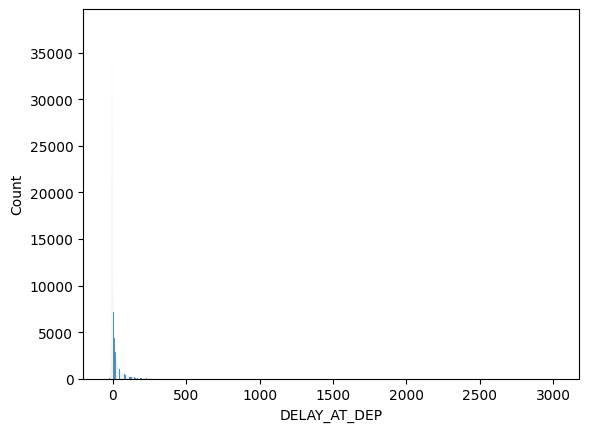

In [166]:
# checking the outliers:
sns.histplot(data=final_dataframe, x="DELAY_AT_DEP")

<Axes: xlabel='DELAY_AT_ARR', ylabel='Count'>

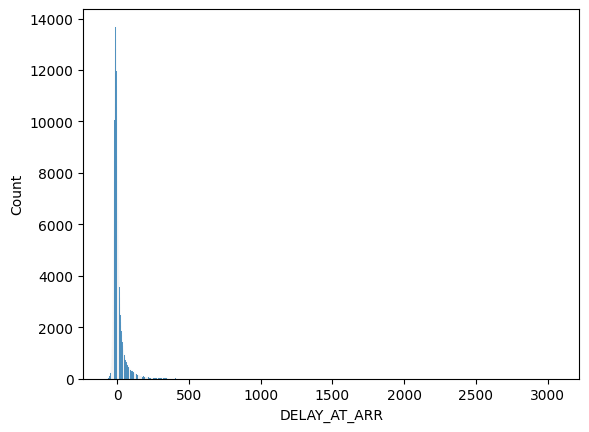

In [167]:
sns.histplot(data=final_dataframe, x="DELAY_AT_ARR")

<Axes: xlabel='DELAY_AT_DEP'>

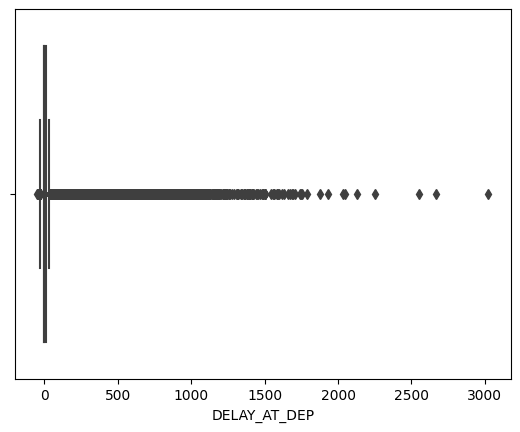

In [168]:
sns.boxplot(x=final_dataframe["DELAY_AT_DEP"])

<Axes: xlabel='DELAY_AT_ARR'>

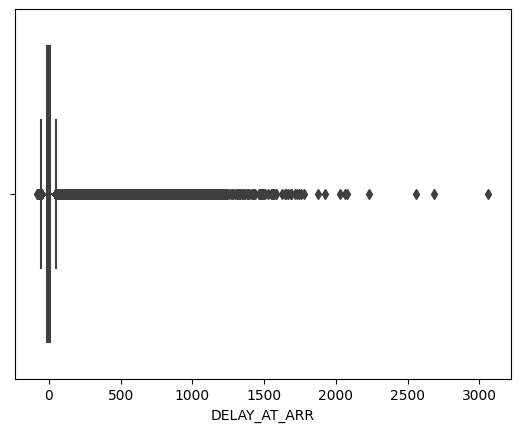

In [169]:
sns.boxplot(x=final_dataframe["DELAY_AT_ARR"])

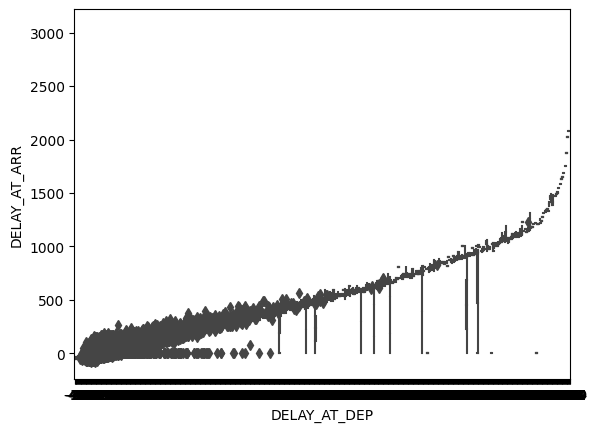

In [170]:

sns.boxplot(x="DELAY_AT_DEP", y="DELAY_AT_ARR", data = final_dataframe)

# Show the plot
plt.show()

In [171]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [172]:
outliers = find_outliers_IQR(final_dataframe["DELAY_AT_DEP"])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

print(outliers)

number of outliers:64176
max outlier value: 3024
min outlier value: -48
38         64
41        161
67         42
72         83
73         55
         ... 
521626    212
521650    107
521652     36
521669     88
521733     44
Name: DELAY_AT_DEP, Length: 64176, dtype: int64


For the purpose of this study, I will not remove the outliers.

In [173]:
final_dataframe.reset_index(drop=True, inplace=True)

In [174]:
final_dataframe

,DATE,CARRIER,TAIL,FROM,TO,DELAY_AT_DEP,DELAY_AT_ARR,AIRPORT,CITY,LATITUDE,LONGITUDE,State Population,STATE,State Inititals
0,01/01/2023 00:00,9E,N131EV,JFK,BGR,-4,-7,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
1,01/01/2023 00:00,9E,N131EV,JFK,ORD,-4,-24,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
2,01/01/2023 00:00,9E,N135EV,JFK,DTW,2,1,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
3,01/01/2023 00:00,9E,N136EV,JFK,RDU,-5,-30,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
4,01/01/2023 00:00,9E,N166PQ,JFK,MKE,1,0,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521738,1/31/2023 12:00:00 AM,WN,N8762Q,MHT,BWI,-5,-6,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521739,1/31/2023 12:00:00 AM,WN,N945WN,MHT,BWI,-5,-11,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521740,1/31/2023 12:00:00 AM,WN,N969WN,MHT,MDW,-8,18,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH
521741,1/31/2023 12:00:00 AM,YX,N726YX,MHT,EWR,-16,-9,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH


In [175]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521743 entries, 0 to 521742
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              521743 non-null  object 
 1   CARRIER           521743 non-null  object 
 2   TAIL              521743 non-null  object 
 3   FROM              521743 non-null  object 
 4   TO                521743 non-null  object 
 5   DELAY_AT_DEP      521743 non-null  int64  
 6   DELAY_AT_ARR      521743 non-null  int64  
 7   AIRPORT           521743 non-null  object 
 8   CITY              521743 non-null  object 
 9   LATITUDE          521743 non-null  float64
 10  LONGITUDE         521743 non-null  float64
 11  State Population  521743 non-null  int64  
 12  STATE             521743 non-null  object 
 13  State Inititals   521743 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 55.7+ MB


I prepared a function to calculate the time deviation from the planning: 

In [176]:
# def deviation(row):
#   # if departure delay is bigger than arrival delay, the route planning was conservative
    # if arrival delay is bigger that the departure delay, the route planning was agressive


def deviation(row):
  if row["DELAY_AT_DEP"] > row["DELAY_AT_ARR"] and row["DELAY_AT_DEP"] < 0 and row["DELAY_AT_ARR"] < 0:
    return int(row['DELAY_AT_DEP']-row['DELAY_AT_ARR'])*-1
  elif row["DELAY_AT_DEP"] > row["DELAY_AT_ARR"] and row["DELAY_AT_DEP"] > 0 and row["DELAY_AT_ARR"] > 0:
    return int(row['DELAY_AT_ARR'] - row['DELAY_AT_DEP'])
  elif row["DELAY_AT_DEP"] > row["DELAY_AT_ARR"] and row["DELAY_AT_DEP"] > 0 and row["DELAY_AT_ARR"] < 0:
    return int(abs(row['DELAY_AT_ARR']) + abs(row['DELAY_AT_DEP']))*-1
  elif row["DELAY_AT_DEP"] > row["DELAY_AT_ARR"] and row["DELAY_AT_DEP"] == 0 and row["DELAY_AT_ARR"] < 0:
    return int(row['DELAY_AT_ARR'])
  elif row["DELAY_AT_DEP"] > row["DELAY_AT_ARR"] and row["DELAY_AT_DEP"] > 0 and row["DELAY_AT_ARR"] == 0:
    return int(row['DELAY_AT_DEP']*-1)
  elif row["DELAY_AT_DEP"] < row["DELAY_AT_ARR"] and row["DELAY_AT_DEP"] < 0 and row["DELAY_AT_ARR"] > 0:
    return int(abs(row['DELAY_AT_ARR']) + abs(row['DELAY_AT_DEP']))
  elif row["DELAY_AT_DEP"] < row["DELAY_AT_ARR"] and row["DELAY_AT_DEP"] < 0 and row["DELAY_AT_ARR"] < 0:
    return int(abs(row['DELAY_AT_DEP']) - abs(row['DELAY_AT_ARR']))
  elif row["DELAY_AT_DEP"] == 0 and row["DELAY_AT_ARR"] == 0:
    return 0
  elif row["DELAY_AT_DEP"] == row["DELAY_AT_ARR"]:
    return 0
  elif row["DELAY_AT_DEP"] < row["DELAY_AT_ARR"] and row["DELAY_AT_DEP"] > 0 and row["DELAY_AT_ARR"] > 0:
    return int(row['DELAY_AT_ARR']-row['DELAY_AT_DEP'])
  elif row["DELAY_AT_DEP"] == 0 and row["DELAY_AT_ARR"] > 0:
    return int(row['DELAY_AT_ARR'])
  elif row["DELAY_AT_DEP"] < 0 and row["DELAY_AT_ARR"] == 0:
    return int(row['DELAY_AT_DEP'])*-1


In [177]:
final_dataframe['deviation'] = final_dataframe.apply(deviation, axis=1)

In [178]:
#final_dataframe

In [179]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521743 entries, 0 to 521742
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              521743 non-null  object 
 1   CARRIER           521743 non-null  object 
 2   TAIL              521743 non-null  object 
 3   FROM              521743 non-null  object 
 4   TO                521743 non-null  object 
 5   DELAY_AT_DEP      521743 non-null  int64  
 6   DELAY_AT_ARR      521743 non-null  int64  
 7   AIRPORT           521743 non-null  object 
 8   CITY              521743 non-null  object 
 9   LATITUDE          521743 non-null  float64
 10  LONGITUDE         521743 non-null  float64
 11  State Population  521743 non-null  int64  
 12  STATE             521743 non-null  object 
 13  State Inititals   521743 non-null  object 
 14  deviation         521743 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 59.7+ MB


In [180]:
#code to extract the row with the null data to check if there are parameters missing in the function
#nan_df = final_dataframe[final_dataframe['deviation'].isna()]
#nan_df

In [181]:
#aleatory check of deviation function accuracy (from 0 to 521743)
final_dataframe.iloc[55555]

DATE                1/27/2023 12:00:00 AM
CARRIER                                WN
TAIL                               N8508W
FROM                                  MDW
TO                                    PHL
DELAY_AT_DEP                           20
DELAY_AT_ARR                           25
AIRPORT                    Chicago Midway
CITY                              Chicago
LATITUDE                        41.785983
LONGITUDE                      -87.752424
State Population                 12582032
STATE                            Illinois
State Inititals                        IL
deviation                               5
Name: 55555, dtype: object

In [182]:
final_dataframe.DELAY_AT_DEP.sum()

6719317

In [183]:
final_dataframe.describe()

,DELAY_AT_DEP,DELAY_AT_ARR,LATITUDE,LONGITUDE,State Population,deviation
count,521743.000000,521743.000000,521743.000000,521743.000000,5.217430e+05,521743.000000
mean,12.878595,7.729436,36.543480,-94.983251,1.526695e+07,-5.149160
std,54.906874,57.116241,6.029886,18.754305,1.167843e+07,15.658203
min,-48.000000,-80.000000,18.008303,-176.646031,5.813810e+05,-1237.000000
25%,-6.000000,-15.000000,32.898646,-111.977773,6.164660e+06,-14.000000
50%,-2.000000,-5.000000,37.361862,-87.904464,1.091288e+07,-7.000000
75%,10.000000,11.000000,40.777243,-80.943126,2.224482e+07,2.000000
max,3024.000000,3063.000000,71.285448,-66.001833,3.902934e+07,209.000000


I will create a Field with the Route in order to prepare this data for analysis:

In [184]:
#create route field 
final_dataframe['Route'] = final_dataframe['FROM'].astype(str) + " - " +  final_dataframe['TO'].astype(str)

In [185]:
final_dataframe

,DATE,CARRIER,TAIL,FROM,TO,DELAY_AT_DEP,DELAY_AT_ARR,AIRPORT,CITY,LATITUDE,LONGITUDE,State Population,STATE,State Inititals,deviation,Route
0,01/01/2023 00:00,9E,N131EV,JFK,BGR,-4,-7,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY,-3,JFK - BGR
1,01/01/2023 00:00,9E,N131EV,JFK,ORD,-4,-24,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY,-20,JFK - ORD
2,01/01/2023 00:00,9E,N135EV,JFK,DTW,2,1,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY,-1,JFK - DTW
3,01/01/2023 00:00,9E,N136EV,JFK,RDU,-5,-30,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY,-25,JFK - RDU
4,01/01/2023 00:00,9E,N166PQ,JFK,MKE,1,0,John F Kennedy Intl,New York,40.639751,-73.778926,19677151,New York,NY,-1,JFK - MKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521738,1/31/2023 12:00:00 AM,WN,N8762Q,MHT,BWI,-5,-6,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH,-1,MHT - BWI
521739,1/31/2023 12:00:00 AM,WN,N945WN,MHT,BWI,-5,-11,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH,-6,MHT - BWI
521740,1/31/2023 12:00:00 AM,WN,N969WN,MHT,MDW,-8,18,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH,26,MHT - MDW
521741,1/31/2023 12:00:00 AM,YX,N726YX,MHT,EWR,-16,-9,Manchester,Manchester,42.934516,-71.437056,1395231,New Hampshire,NH,7,MHT - EWR


In [186]:
# MINUTES OF DELAY FOR EACH FLIGHT FLOWN

# is there routes with more delays than others?


In [187]:
# on time performance - per flight flown - average, percentage....

In [188]:
#export excel with this information

#final_dataframe.to_excel('/content/drive/MyDrive/Airline projects/data.xlsx', index=False)

In [189]:
#export csv with this information

#final_dataframe.to_csv("/content/drive/MyDrive/Airline projects/datacsv.csv", index=False)

Additional Sources used:

https://www.kaggle.com/datasets/aravindram11/list-of-us-airports

https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

https://www.thespreadsheetguru.com/blog/list-united-states-capitals-abbreviations

https://www.iata.org/en/publications/directories/code-search/?airline.search=yx



In [190]:
# prepare a excel file with sheet for flight data and another sheet for population data:
only_flights = final_dataframe.drop(columns = ["State Population"])


In [191]:
# prepare functions to create fields for: early departure, Ontime flight, Delayed flight, delays up to 3 minutes, delays up to 15 minutes, delays more than 15 minutes

def early(minutes):
  if minutes < 0:
    return 1
  else:
    return 0

def ontime(minutes):
  if minutes == 0:
    return 1
  else:
    return 0

def delayed(minutes):
  if minutes > 0:
    return 1
  else:
    return 0

def delayed3(minutes):
  if minutes > 0 and minutes <= 3:
    return 1
  else:
    return 0

def delayed15(minutes):
  if minutes > 3 and minutes <= 15:
    return 1
  else:
    return 0

def delayedplus15(minutes):
  if minutes > 15:
    return 1
  else:
    return 0

In [192]:
only_flights['early'] = only_flights.apply(lambda row: early(row["DELAY_AT_DEP"]), axis=1)
only_flights['ontime'] = only_flights.apply(lambda row: ontime(row["DELAY_AT_DEP"]), axis=1)
only_flights['delayed'] = only_flights.apply(lambda row: delayed(row["DELAY_AT_DEP"]), axis=1)
only_flights['delayed3'] = only_flights.apply(lambda row: delayed3(row["DELAY_AT_DEP"]), axis=1)
only_flights['delayed15'] = only_flights.apply(lambda row: delayed15(row["DELAY_AT_DEP"]), axis=1)
only_flights['delayedplus15'] = only_flights.apply(lambda row: delayedplus15(row["DELAY_AT_DEP"]), axis=1)


In [193]:
only_flights

,DATE,CARRIER,TAIL,FROM,TO,DELAY_AT_DEP,DELAY_AT_ARR,AIRPORT,CITY,LATITUDE,...,STATE,State Inititals,deviation,Route,early,ontime,delayed,delayed3,delayed15,delayedplus15
0,01/01/2023 00:00,9E,N131EV,JFK,BGR,-4,-7,John F Kennedy Intl,New York,40.639751,...,New York,NY,-3,JFK - BGR,1,0,0,0,0,0
1,01/01/2023 00:00,9E,N131EV,JFK,ORD,-4,-24,John F Kennedy Intl,New York,40.639751,...,New York,NY,-20,JFK - ORD,1,0,0,0,0,0
2,01/01/2023 00:00,9E,N135EV,JFK,DTW,2,1,John F Kennedy Intl,New York,40.639751,...,New York,NY,-1,JFK - DTW,0,0,1,1,0,0
3,01/01/2023 00:00,9E,N136EV,JFK,RDU,-5,-30,John F Kennedy Intl,New York,40.639751,...,New York,NY,-25,JFK - RDU,1,0,0,0,0,0
4,01/01/2023 00:00,9E,N166PQ,JFK,MKE,1,0,John F Kennedy Intl,New York,40.639751,...,New York,NY,-1,JFK - MKE,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521738,1/31/2023 12:00:00 AM,WN,N8762Q,MHT,BWI,-5,-6,Manchester,Manchester,42.934516,...,New Hampshire,NH,-1,MHT - BWI,1,0,0,0,0,0
521739,1/31/2023 12:00:00 AM,WN,N945WN,MHT,BWI,-5,-11,Manchester,Manchester,42.934516,...,New Hampshire,NH,-6,MHT - BWI,1,0,0,0,0,0
521740,1/31/2023 12:00:00 AM,WN,N969WN,MHT,MDW,-8,18,Manchester,Manchester,42.934516,...,New Hampshire,NH,26,MHT - MDW,1,0,0,0,0,0
521741,1/31/2023 12:00:00 AM,YX,N726YX,MHT,EWR,-16,-9,Manchester,Manchester,42.934516,...,New Hampshire,NH,7,MHT - EWR,1,0,0,0,0,0


In [194]:
#option 2 : One function, one field:

def status(minutes):
  if minutes < 0:
    return "early departure"
  elif minutes == 0:
    return "on time"
  elif minutes > 0 and minutes <= 3:
    return "delayed - 3 min"
  elif minutes > 3 and minutes <= 15:
    return "delayed + 3 min and - 15 min"
  elif minutes > 15:
    return "Delayed + 15 min"


In [195]:
only_flights['status'] = only_flights.apply(lambda row: status(row["DELAY_AT_DEP"]), axis=1)

In [196]:
only_flights.iloc[400]

DATE                  01/02/2023 00:00
CARRIER                             B6
TAIL                            N630JB
FROM                               JFK
TO                                 MSY
DELAY_AT_DEP                       444
DELAY_AT_ARR                       412
AIRPORT            John F Kennedy Intl
CITY                          New York
LATITUDE                     40.639751
LONGITUDE                   -73.778926
STATE                         New York
State Inititals                     NY
deviation                          -32
Route                        JFK - MSY
early                                0
ontime                               0
delayed                              1
delayed3                             0
delayed15                            0
delayedplus15                        1
status                Delayed + 15 min
Name: 400, dtype: object

In [197]:
only_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521743 entries, 0 to 521742
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DATE             521743 non-null  object 
 1   CARRIER          521743 non-null  object 
 2   TAIL             521743 non-null  object 
 3   FROM             521743 non-null  object 
 4   TO               521743 non-null  object 
 5   DELAY_AT_DEP     521743 non-null  int64  
 6   DELAY_AT_ARR     521743 non-null  int64  
 7   AIRPORT          521743 non-null  object 
 8   CITY             521743 non-null  object 
 9   LATITUDE         521743 non-null  float64
 10  LONGITUDE        521743 non-null  float64
 11  STATE            521743 non-null  object 
 12  State Inititals  521743 non-null  object 
 13  deviation        521743 non-null  int64  
 14  Route            521743 non-null  object 
 15  early            521743 non-null  int64  
 16  ontime           521743 non-null  int6

In [198]:
only_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521743 entries, 0 to 521742
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DATE             521743 non-null  object 
 1   CARRIER          521743 non-null  object 
 2   TAIL             521743 non-null  object 
 3   FROM             521743 non-null  object 
 4   TO               521743 non-null  object 
 5   DELAY_AT_DEP     521743 non-null  int64  
 6   DELAY_AT_ARR     521743 non-null  int64  
 7   AIRPORT          521743 non-null  object 
 8   CITY             521743 non-null  object 
 9   LATITUDE         521743 non-null  float64
 10  LONGITUDE        521743 non-null  float64
 11  STATE            521743 non-null  object 
 12  State Inititals  521743 non-null  object 
 13  deviation        521743 non-null  int64  
 14  Route            521743 non-null  object 
 15  early            521743 non-null  int64  
 16  ontime           521743 non-null  int6

In [199]:
only_flights.CARRIER.value_counts()

WN    108820
DL     73975
AA     73209
UA     56072
OO     47369
YX     24024
B6     22987
NK     21254
AS     19393
MQ     17906
9E     16353
OH     14649
F9     12847
HA      6614
G4      6271
Name: CARRIER, dtype: int64

In [200]:
Southwest = only_flights[only_flights['CARRIER'] == "WN"]

In [201]:
Southwest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108820 entries, 10857 to 521740
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DATE             108820 non-null  object 
 1   CARRIER          108820 non-null  object 
 2   TAIL             108820 non-null  object 
 3   FROM             108820 non-null  object 
 4   TO               108820 non-null  object 
 5   DELAY_AT_DEP     108820 non-null  int64  
 6   DELAY_AT_ARR     108820 non-null  int64  
 7   AIRPORT          108820 non-null  object 
 8   CITY             108820 non-null  object 
 9   LATITUDE         108820 non-null  float64
 10  LONGITUDE        108820 non-null  float64
 11  STATE            108820 non-null  object 
 12  State Inititals  108820 non-null  object 
 13  deviation        108820 non-null  int64  
 14  Route            108820 non-null  object 
 15  early            108820 non-null  int64  
 16  ontime           108820 non-null  

In [202]:
Southwest.delayedplus15.sum()

23519

In [203]:
only_flights.ontime.sum()

23610

In [204]:
only_flights.delayed.sum()

200267

In [205]:
only_flights.early.sum()

297866

In [206]:
only_flights.status.value_counts()

early departure                 297866
Delayed + 15 min                106540
delayed + 3 min and - 15 min     64037
delayed - 3 min                  29690
on time                          23610
Name: status, dtype: int64

In [207]:
only_flights.delayedplus15.value_counts()

0    415203
1    106540
Name: delayedplus15, dtype: int64

In [208]:
Southwest.delayed.value_counts()

0    57115
1    51705
Name: delayed, dtype: int64

In [209]:
# with pd.ExcelWriter("/content/drive/MyDrive/Airline projects/us0123.xlsx") as writer:
#     only_flights.to_excel(writer, sheet_name='flights')
#     states_info.to_excel(writer, sheet_name='population')
    